In [6]:
import sys
sys.path.append("..")
from utils import fit_and_plot, montecarlo_estimator
import numpy as np
import pandas as pd

In [7]:
df_exp1 = pd.read_csv("../data/5CL Lab 1 - Data Collection, Exp1.csv", skiprows=1, nrows=10)
df_exp1

,Object Position,Lens B Pos,Lens A Position,Final Image Pos,B Image Pos*,B Obj Dist*,B Image Dist*,A Obj Dist*,A Image Dist*,Measured A-Obj Dist,F-Obj Size,F-Img Size,Magnification*,Unnamed: 13,Unnamed: 14
0,16,24.0,43.4,76.4,6.857143,8.0,-17.142857,36.542857,37.468725,33.0,1.57,2.87,-1.828025,NaN,NaN
1,16,31.3,58.5,76.4,796.300000,15.3,765.000000,-737.800000,18.047468,17.9,1.57,1.83,-1.165605,NaN,NaN
2,16,41.1,68.7,76.4,78.377228,25.1,37.277228,-9.677228,6.353667,7.7,1.57,1.44,-0.917197,NaN,NaN
3,16,21.0,41.3,89.8,13.500000,5.0,-7.500000,27.800000,55.301075,48.5,1.57,3.99,-2.541401,NaN,NaN
4,16,23.0,64.2,89.8,9.875000,7.0,-13.125000,54.325000,28.053385,25.6,1.57,1.38,-0.878981,NaN,NaN
5,16,41.3,60.3,70.0,78.144660,25.3,36.844660,-17.844660,9.083211,9.7,1.57,1.06,-0.675159,NaN,NaN
6,16,46.8,61.2,70.0,76.040506,30.8,29.240506,-14.840506,8.234709,8.8,1.57,0.76,-0.484076,NaN,NaN
7,16,30.9,51.6,70.0,-2204.100000,14.9,-2235.000000,2255.700000,18.652981,18.4,1.57,1.70,-1.082803,NaN,NaN
8,16,30.0,75.3,95.0,-180.000000,14.0,-210.000000,255.300000,19.945312,19.7,1.57,1.73,-1.101911,NaN,NaN
9,16,39.8,55.1,66.3,80.368182,23.8,40.568182,-25.268182,10.680393,11.2,1.57,1.17,-0.745223,NaN,NaN


In [13]:
class Exp1Model:
    def forward(self, x, f):
        return 1/f - x
    def backward(self, x, f):
        return -1
exp1model = Exp1Model()

In [14]:
def y_model(p_s, p_a, p_b, f_a):
    return 1/(p_a - 1/(1/f_a - 1/(p_s - p_a)) - p_b)
y_input = (
    df_exp1["Final Image Pos"],
    df_exp1["Lens A Position"],
    df_exp1["Lens B Pos"],
    17.52*np.ones_like(df_exp1["Lens B Pos"])
    )
sig_y = montecarlo_estimator(y_model, y_input,
    (0.1, 0.1, 0.1, 0.05), 100)
print(y_model(*y_input))

0   -0.055714
1   -0.001253
2    0.024191
3   -0.140291
4   -0.069887
5    0.024551
6    0.031171
7   -0.002893
8   -0.008848
9    0.021576
dtype: float64


[[15.62331895  0.04934593]]


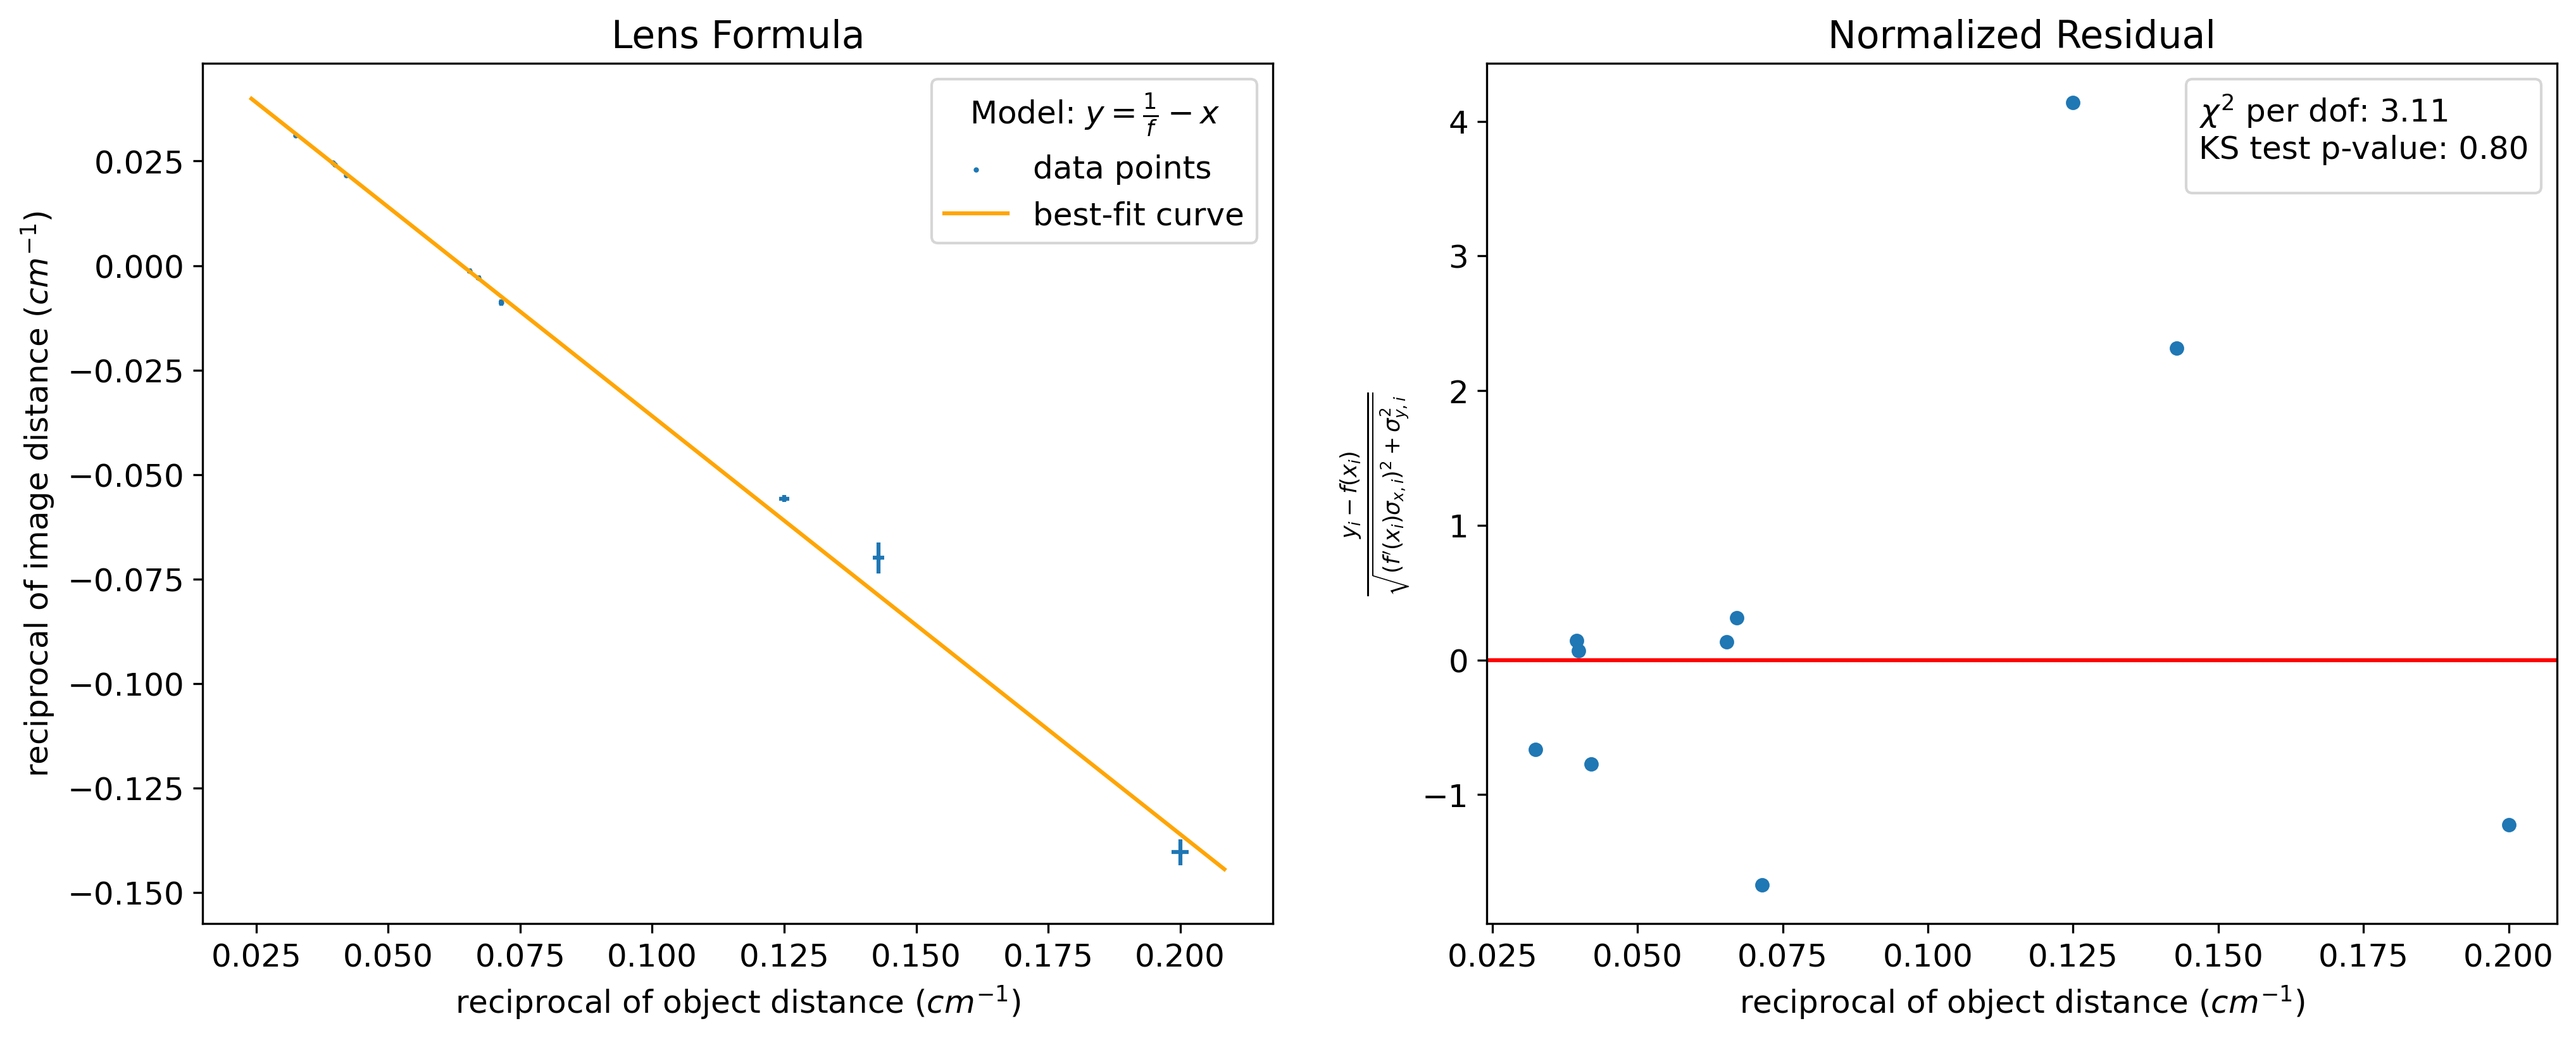

In [16]:
fit_and_plot(
    exp1model,
    1/(df_exp1["Lens B Pos"] - df_exp1["Object Position"]), 
    y_model(*y_input),
    1/(df_exp1["Lens B Pos"] - df_exp1["Object Position"])*np.sqrt((0.1/df_exp1["Lens B Pos"])**2 + (0.1/df_exp1["Object Position"])**2),
    sig_y,
    1,
    [15],
    r"reciprocal of object distance ($cm^{-1}$)",
    r"reciprocal of image distance ($cm^{-1}$)",
    "Lens Formula",
    r"$y = \frac{1}{f} - x$",
    True,
    );

In [6]:
df_exp3 = pd.read_csv("../data/5CL Lab 1 - exp 3.csv")
df_exp3[:10]

,object position,lens D position,lens B position,lens B uncertainty,Screen position,Unnamed: 5,Image Distance B,Object Distance B,Object Distance D,Object Location B,Image Distance D,Focal Length D
0,14,44.0,63.0,3.0,94,NaN,31.0,29.062500,30.0,33.937500,-10.062500,-15.141066
1,14,40.5,54.8,0.8,94,NaN,39.2,24.297521,26.5,30.502479,-9.997521,-16.054212
2,14,33.2,70.6,0.9,94,NaN,23.4,41.785714,19.2,28.814286,-4.385714,-5.684089
3,14,37.6,69.1,0.8,94,NaN,24.9,37.727273,23.6,31.372727,-6.227273,-8.459445
4,14,23.7,38.6,0.6,94,NaN,55.4,20.569307,9.7,18.030693,-5.669307,-13.643380
5,14,23.7,72.2,1.0,94,NaN,21.8,48.088235,9.7,24.111765,0.411765,0.394997
6,14,31.0,44.1,0.7,94,NaN,49.9,21.446991,17.0,22.653009,-8.346991,-16.398788
7,14,25.2,39.6,0.6,94,NaN,54.4,20.710660,11.2,18.889340,-6.310660,-14.455814
8,14,33.4,46.6,0.6,94,NaN,47.4,21.944444,19.4,24.655556,-8.744444,-15.920542
9,14,28.0,41.7,0.3,94,NaN,52.3,21.032172,14.0,20.667828,-7.332172,-15.394878


In [7]:
class Exp3Model:
    def forward(self, x, f):
        return 1/(1/f - 1/x)
    def backward(self, x, f):
        return 1/(1/f - 1/x)**2 * (1/(f**2))
exp3_model = Exp3Model()

In [21]:
def y_model(p_s, p_d, p_b, f_b):
    return p_b - p_d - 1/(1/f_b - 1/(p_s - p_b))
y_input = (
    df_exp3["Screen position"],
    df_exp3["lens D position"],
    df_exp3["lens B position"],
    15*np.ones_like(df_exp3["lens B position"])
    )
sig_y = montecarlo_estimator(x_model, x_input,
    (0.1, 0.1, df_exp3["lens B uncertainty"], 0.27), 100)
print(y_model(*y_input))

0   -10.062500
1    -9.997521
2    -4.385714
3    -6.227273
4    -5.669307
5     0.411765
6    -8.346991
7    -6.310660
8    -8.744444
9    -7.332172
dtype: float64


[[-15.33503794   1.10917608]]


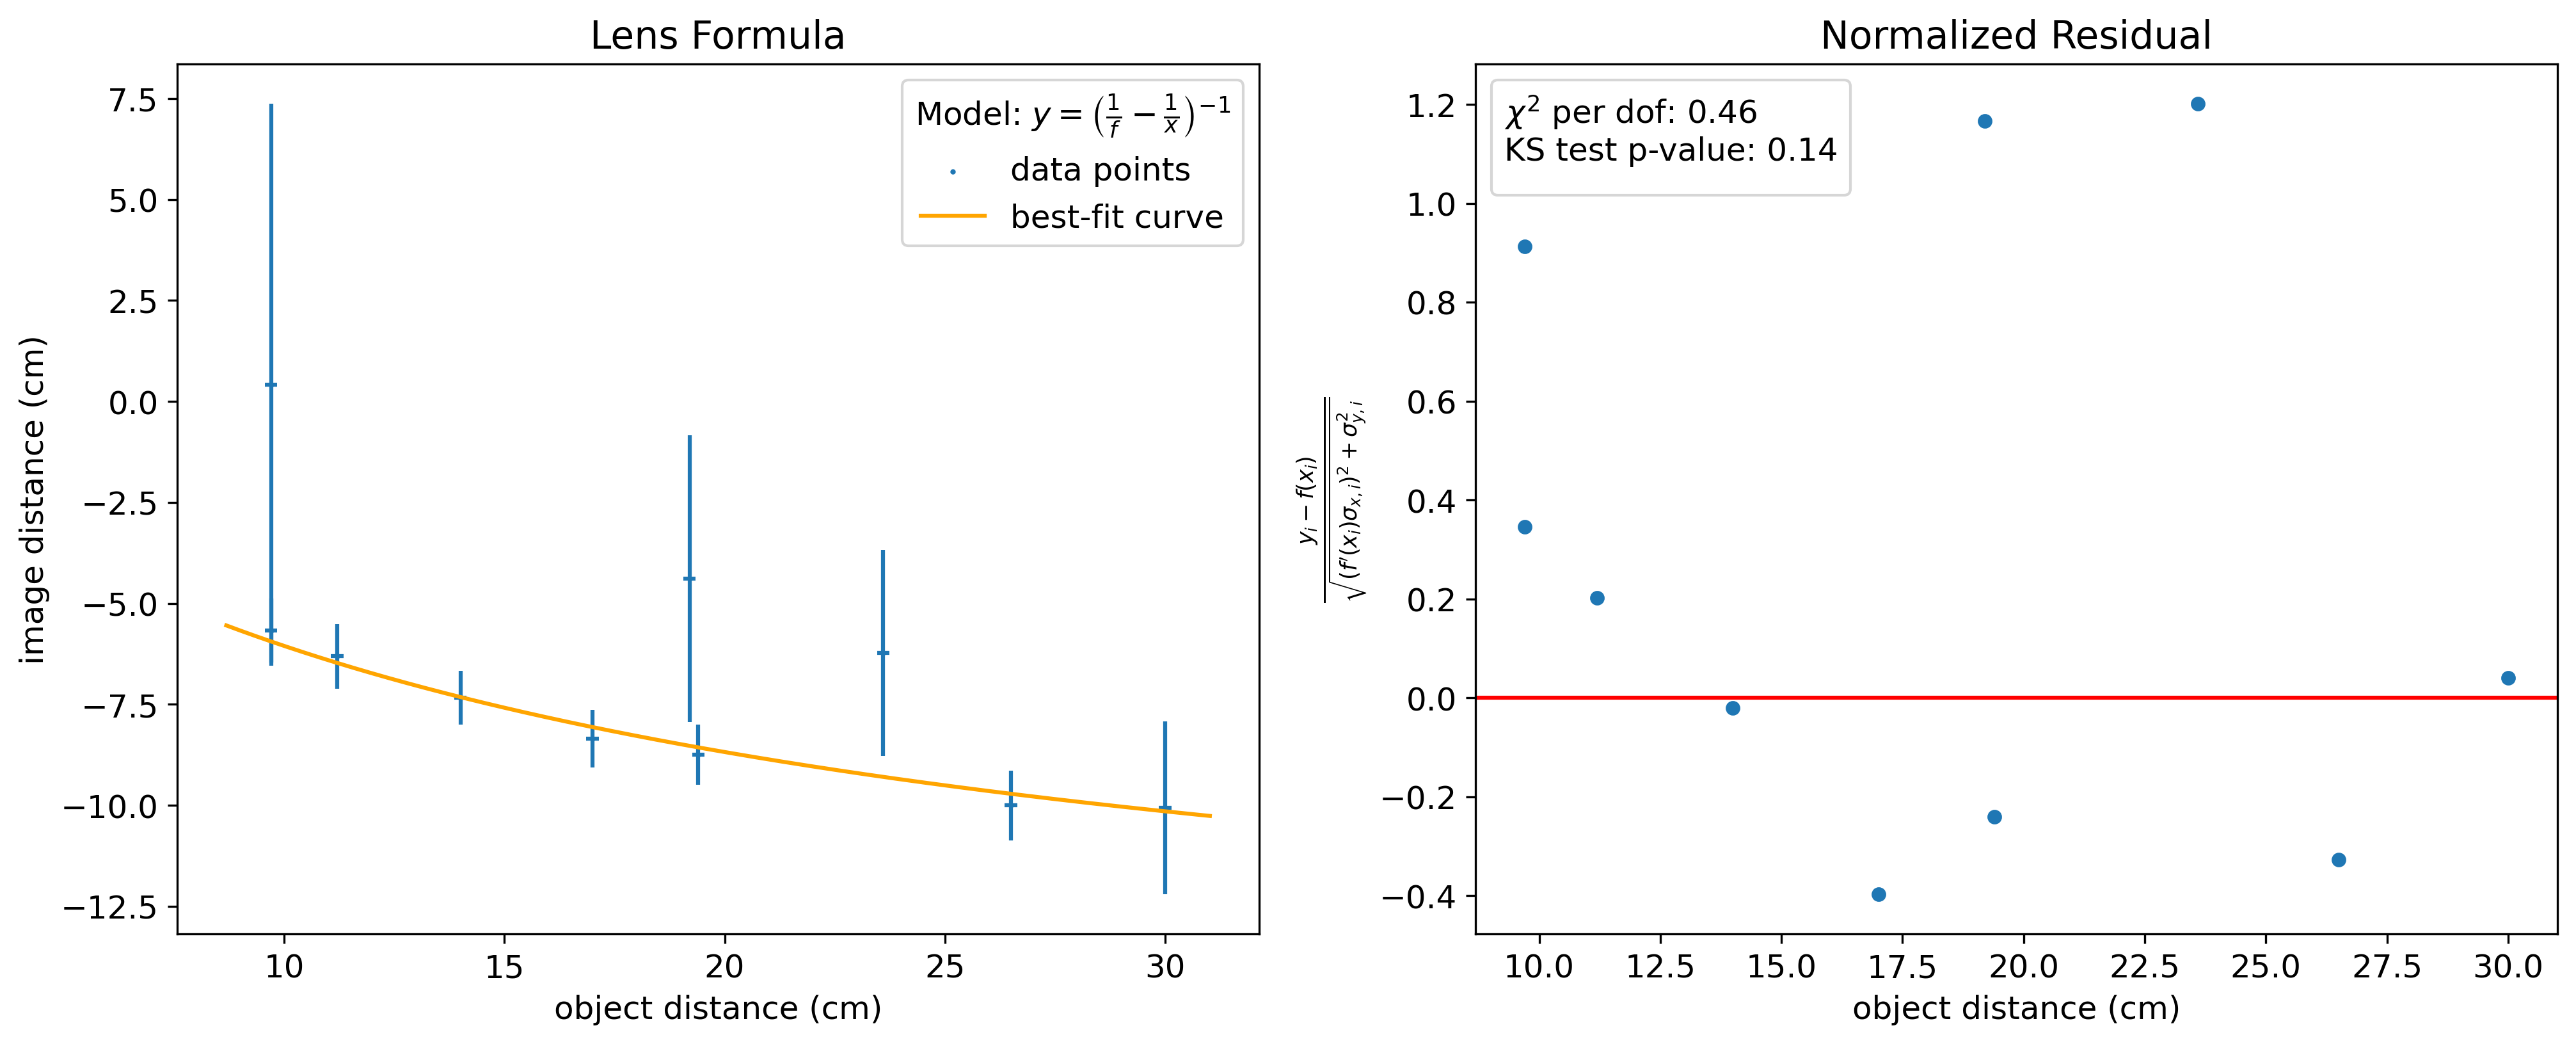

In [22]:
fit_and_plot(
    exp3_model,
    df_exp3["lens D position"] - df_exp3["object position"], 
    y_model(*y_input),
    np.ones(df_exp3.shape[0]) * (0.1**2 + 0.1**2)**0.5,
    sig_y,
    1,
    [-15],
    "object distance (cm)",
    "image distance (cm)",
    "Lens Formula",
    r"$y = \left(\frac{1}{f}-\frac{1}{x}\right)^{-1}$",
    True,
    );

In [25]:
class Exp3Model2:
    def forward(self, x, R):
        return -2/R - x
    def backward(self, x, R):
        return -1
exp3model2 = Exp3Model2()

In [26]:
df_exp3_2 = pd.read_csv("../data/5CL Lab 1 - Exp3B.csv", skiprows=1, nrows=11)
df_exp3_2

,Object Position,Lens Position,Distance to Image,Uncertainty,Derived Focal Len,Derived R
0,14,27.0,63.30,5.50,10.785059,-21.570118
1,14,28.5,40.70,4.50,10.691123,-21.382246
2,14,30.0,33.30,1.30,10.807302,-21.614604
3,14,33.0,25.90,1.00,10.959911,-21.919822
4,14,36.0,21.90,0.75,10.974943,-21.949886
5,14,38.0,20.20,0.95,10.968326,-21.936652
6,14,40.5,18.80,0.60,10.997792,-21.995585
7,14,42.0,17.20,0.35,10.654867,-21.309735
8,14,48.0,16.00,0.40,10.880000,-21.760000
9,14,55.0,14.25,0.25,10.574661,-21.149321


[[-21.66300318   0.10644269]]


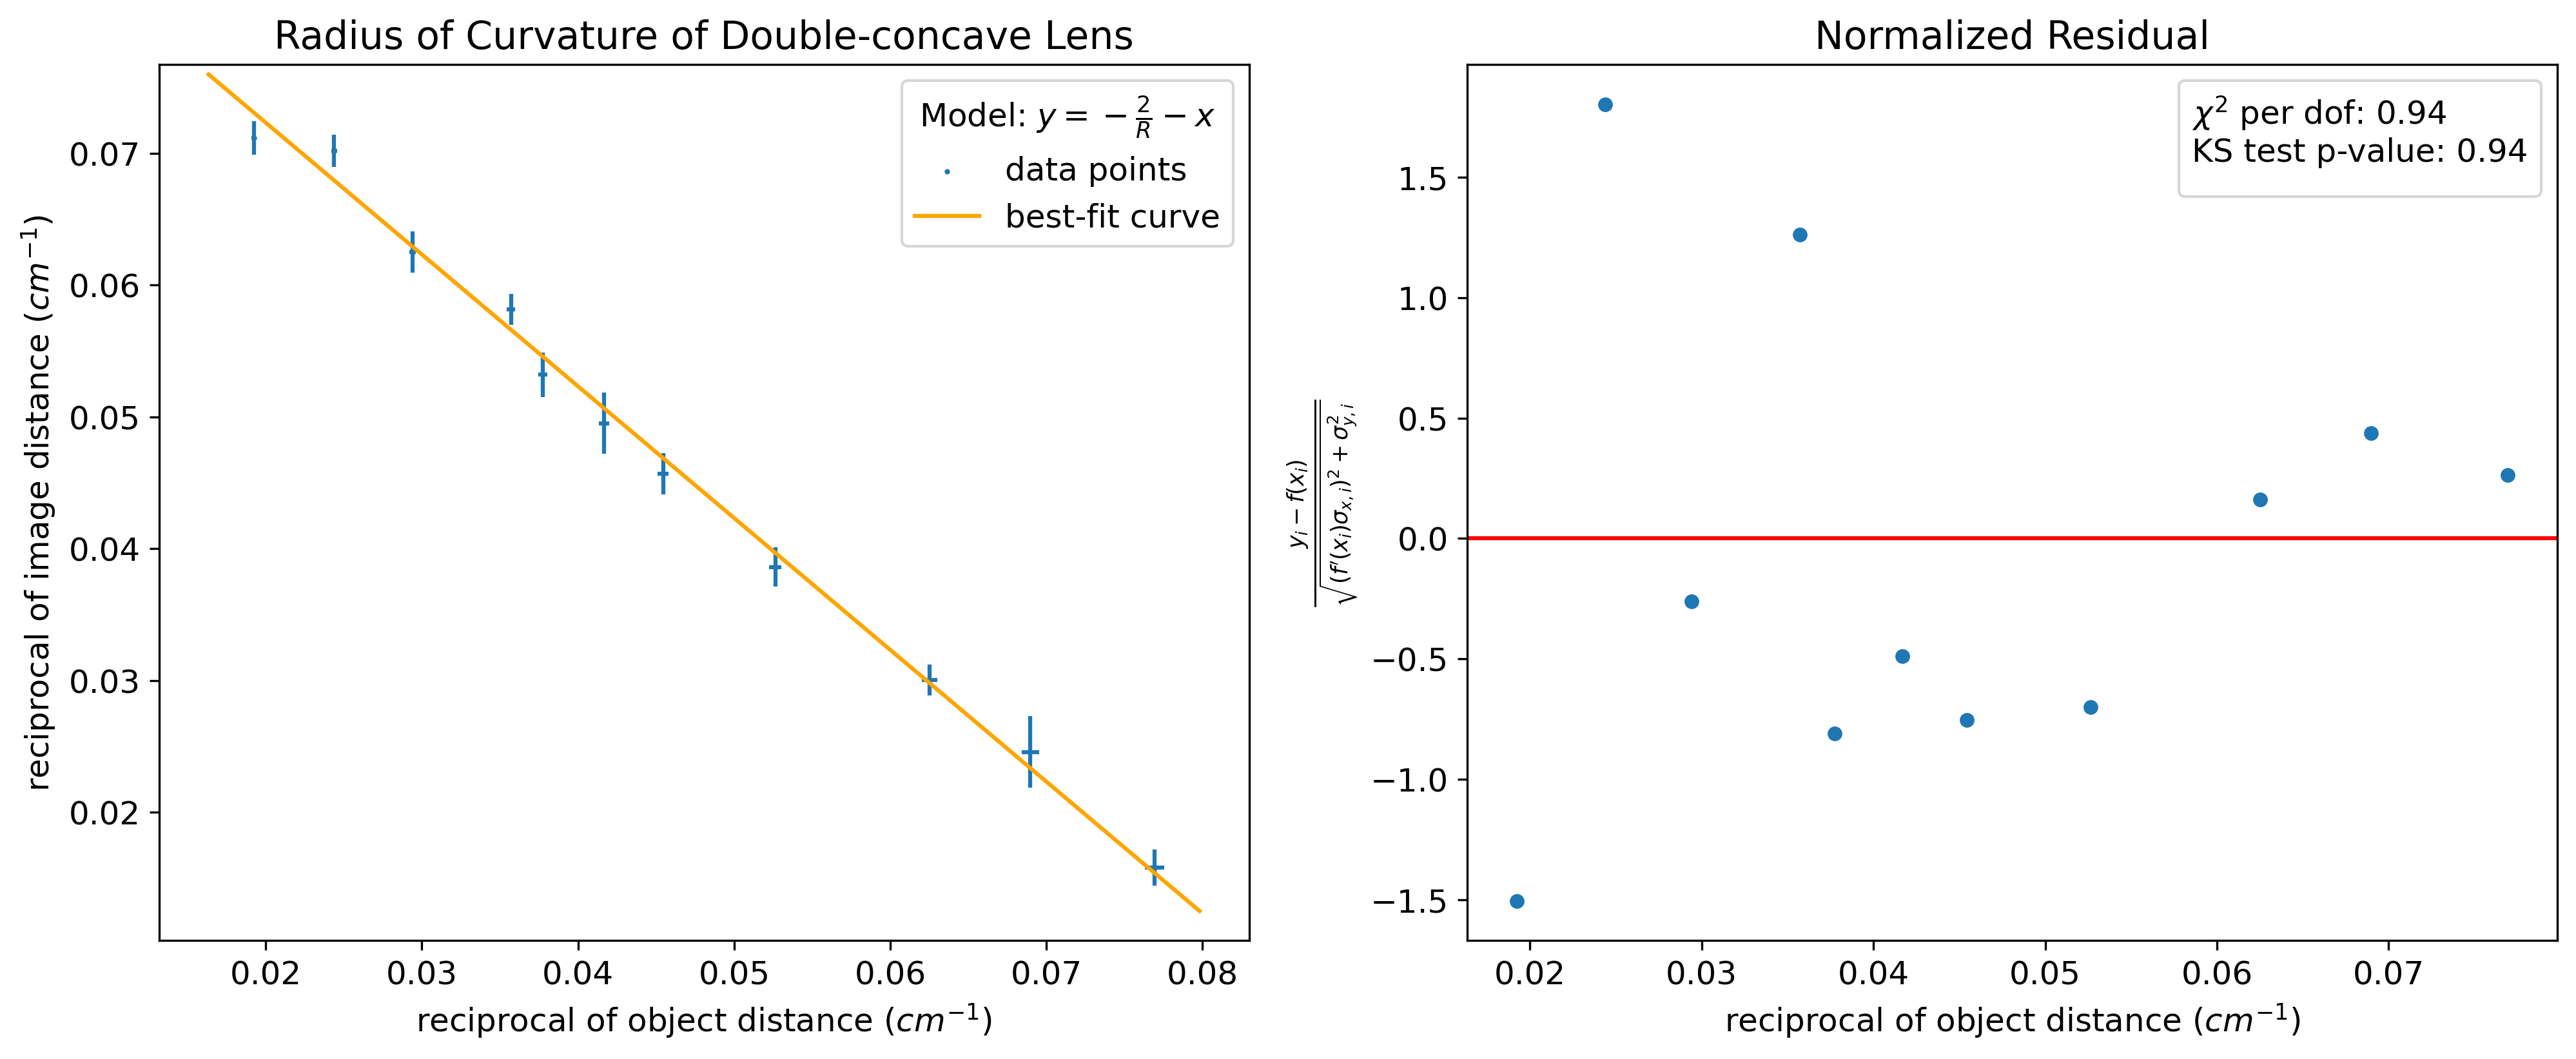

In [29]:
fit_and_plot(
    exp3model2,
    1/(df_exp3_2["Lens Position"] - df_exp3_2["Object Position"]), 
    1/df_exp3_2["Distance to Image"],
    1/(df_exp3_2["Lens Position"] - df_exp3_2["Object Position"])*np.sqrt((0.1/df_exp3_2["Lens Position"])**2 + (0.1/df_exp3_2["Object Position"])**2),
    df_exp3_2["Uncertainty"]/np.square(df_exp3_2["Distance to Image"]),
    1,
    [-15],
    r"reciprocal of object distance ($cm^{-1}$)",
    r"reciprocal of image distance ($cm^{-1}$)",
    "Radius of Curvature of Double-concave Lens",
    r"$y = -\frac{2}{R} - x$",
    True,
    );